# 1. Imports and Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from wordcloud import get_single_color_func
from collections import Counter
strip_words = "a about above after again against all also am an and answer any are arent arent around as at based be because been before being below between both but by can cant cannot cant case clear come comment could couldnt couldnt day department did didnt didnt do does doesnt doesnt doing dont dont down during each especially etc even example feel few first for from further generally get given going good great had hadnt hadnt has hasnt hasnt have havent havent having he hed hell hes hed hell her here heres heres hers herself hes him himself his how hows however hows i id ill im ive id if ill im in into is isnt isnt it its its its itself ive job just know lets lets level like line lot made make making many may me means member members more most much mustnt mustnt my myself never no non nor not of off on once one only open or other ought our ours ourselves out over own part perhaps population present rather really said same say says see seems seen shall shant shant she shed shell shes shed shell shes should shouldnt shouldnt so some staff students student such sure survey take taken than that thats thats the their theirs them themselves then there theres theres these they theyd theyll theyre theyve theyd theyll theyre theyve things think this those through time to too under university until up upon us useful very view was wasnt wasnt way we wed well were weve wed well well were were werent werent weve what whats whats when whens whens where wheres wheres which while who whos whom whos whose why whys whys will with within wont wont work working would wouldnt wouldnt you youd youll youre youve youd youll your youre yours yourself yourselves youve others place seem makes comes apply sometime something t though thing done due anything often sometimes actually can't didn't 's 't isn't it's won't"
strip_words = strip_words.split()
# remove punctuation
punc_list = list("'',[]()!?,.<>;:+=-_/`")
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

# 2. Data Imports - Customer Reviews

In [7]:
df = pd.read_excel("Test Comments.xlsx",engine='openpyxl')
df.head()
df.dropna(inplace = True)

# 3. Data Formatting

In [8]:
#text = " ".join(cat.split() for cat in df["Comment"])
categories = [cat for cat in df["Comment"]]
all_categories = " ".join(categories)
# formatting
for p in punc_list:
    all_categories=all_categories.replace(p,"")
all_categories = all_categories.split()
for ac in range(len(all_categories)):
    all_categories[ac] = all_categories[ac].lower()
# get rid of junk words    
def remove_all_occurrences(list_obj, value):
    while value in list_obj:
        all_categories.remove(value)    
    
for w in strip_words:
    remove_all_occurrences(all_categories,w)
remove_all_occurrences(all_categories,["t"])
remove_all_occurrences(all_categories,["s"])
unique_words = Counter(all_categories)
all_categories=" ".join(all_categories)
# unique word list


# 4. Visual Formatting

In [9]:
default_color = 'grey'
max_word_int = 100
w = 2000
h = 2000

x, y = np.ogrid[:300, :300]
# original: mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
# original: 255 * mask.astype(int)
mask = 255 * mask.astype(int)
mask=np.array(Image.open("ellpise.PNG"))
word_cloud = WordCloud(collocations = False,width = w, height=h, background_color = 'white',max_words=max_word_int,mask=mask,prefer_horizontal=1,scale=1,max_font_size=110).generate(all_categories)

In [24]:
top_two = sorted(list(set(unique_words.values())),reverse=True)[:2]
chg_color = []
for k in unique_words.keys():
    if unique_words[k] in top_two:
        chg_color.append(k)
print(chg_color)

['air', 'dehumidifier', 'room']


In [25]:
color_to_words = {
    # will be colored with a red single color function
    '#dd561c': chg_color
}

grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Apply our color function
word_cloud.recolor(color_func=grouped_color_func)

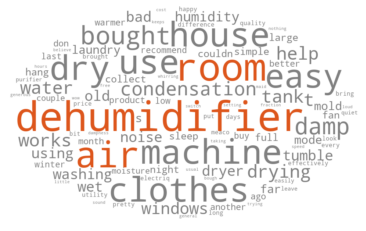

In [26]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.rcParams["figure.figsize"] = (25,4)
plt.axis("off")
plt.show()

In [12]:
word_cloud.to_file("dehumidifier.png")
